### 정확한 순위

+ 시험을 본 학생 N명의 성적을 분실하고, 성적을 비교한 결과의 일부만 가지고 있음
+ N명의 성적은 모두 다른데, 다음은 6명의 학생에 대하여 6번만 성적을 비교한 결과  
  1<2 / 3<4 / 4<2 / 4<6 / 5<2 / 5<4
+ A번 학생의 성적이 B번 학생보다 낮다면 화살표가 A에서 B를 가리키도록 함

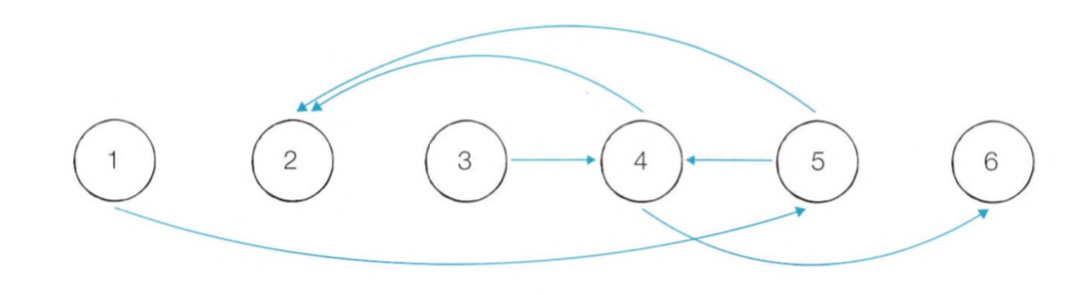

+ 위 그림으로 유추해서 순위를 정확히 알 수 있는 학생도 있고, 알 수 없는 학생도 있음
+ 예를 들어 1번 학생은 5번 학생보다 성적이 낮고, 5번 학생은 4번 학생보다 성적이 낮으므로 1번 학생은 4번 학생보다 성적이 낮음
+ 1,3,5번 학생은 모두 4번 학생보다 성적이 낮다고 볼 수 있음
+ 4번 학생은 2,6번 학생보다 성적이 낮음
+ 4번 학생보다 성적이 낮은 학생은 3명, 높은 학생은 2명이므로 4번 학생의 성적 순위 알 수 있음
+ 하지만 다른 학생은 정확한 순위 알 수 없음

+ 학생들의 성적을 비교한 결과가 주어질 때, 성적 순위를 정확히 알 수 있는 학생은 모두 몇 명인지 계산하는 프로그램 작성

**입력 조건**  
+ 첫째 줄에 학생들의 수 N(2 <= N <= 500)과 두 학생의 성적을 비교한 횟수 M(2 <= M <= 10,000)이 주어짐
+ 다음 M개의 각 줄에는 두 학생의 성적을 비교한 결과를 나타내는 두 양의 정수 A와 B가 주어짐  
  -> A번 학생의 성적이 B번 학생보다 낮다는 것을 의미

**출력 조건**  
+ 첫째 줄에 성적 순위를 정확히 알 수 있는 학생이 몇 명인지 출력하기

**입력 예시**  
6 6  
1 5  
3 4  
4 2  
4 6  
5 2  
5 4  

**출력 예시**  
1  

In [ ]:
# 답안

INF = int(1e9)

n, m = map(int, input().split())

#2차원 리스트를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0
            
# 각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 1로 설정
    a, b = map(int, input().split())
    graph[a][b] = 1

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

result = 0
# 각 학생을 번호에 따라 한 명씩 확인하며 도달 가능한지 체크
for i in range(1, n+1):
    count = 0
    for j in range(1, n+1):
        if graph[i][j] != INF or graph[j][i] != INF:
            count += 1
    if count == n:
        result = 1
print(result)